# Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset


In [ ]:
uploaded = files.upload()

Saving Inflation dataset.csv to Inflation dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Inflation dataset.csv']))
df.head()

,country,iso3,components,currency,start_date_observations,end_date_observations,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,number_of_observations_food,...,total_food_price_increase_since_start_date,average_annualized_food_inflation,maximum_food_drawdown,average_annualized_food_volatility,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,Rsquared_individual_food_items,Rsquared_individual_other_items,index_confidence_score,imputation_model
0,Afghanistan,AFG,"Bread (1 KG, Index Weight = 1), Rice (Low Qual...",AFN,Jan 2007,Sep 2023,40,40,3,"bread: 2318, rice: 2701, wheat: 2682",...,167.97%,6.06%,-40.67%,7.93%,0.62,0.87,"bread: 0.94, rice: 0.89, wheat: 0.93","exchange_rate_wfp: 1, fuel_diesel: 0.97, wage_...",0.92,"bread: cubist (Andree, 2021), rice: two-stage ..."
1,Burundi,BDI,"Bananas (1 KG, Index Weight = 1), Beans (1 KG,...",BIF,Jan 2007,Aug 2023,72,72,10,"bananas: 5344, beans: 5963, cassava_flour: 594...",...,254.94%,7.86%,-30.77%,12.03%,0.60,0.83,"bananas: 0.88, beans: 0.9, cassava_flour: 0.89...",:,0.90,"bananas: two-stage cubist (Andree and Pape, 20..."
2,Burkina Faso,BFA,"Maize (White) (1 KG, Index Weight = 1), Millet...",XOF,Jan 2007,Jul 2023,64,64,3,"maize: 6615, millet: 7618, sorghum: 7177",...,201.25%,6.81%,-36.7%,13.71%,0.57,0.80,"maize: 0.84, millet: 0.83, sorghum: 0.81",:,0.83,"maize: cubist (Andree, 2021), millet: cubist (..."
3,Central African Republic,CAF,"Cassava (Cossette) (1 KG, Index Weight = 1), M...",XAF,Jan 2007,Jun 2023,42,42,5,"cassava: 2259, maize: 2025, meat_beef: 2147, o...",...,134.62%,5.22%,-24.85%,13.74%,0.39,0.59,"cassava: 0.89, maize: 0.88, meat_beef: 0.95, o...",:,0.89,"cassava: cubist (Andree, 2021), maize: cubist ..."
4,Cameroon,CMR,"Bananas (12 KG, Index Weight = 0.08), Cassava ...",XAF,Apr 2010,Aug 2023,83,83,10,"bananas: 621, cassava: 624, cocoyam: 624, fish...",...,39.02%,2.47%,-2.79%,1.84%,0.25,0.67,"bananas: 0.96, cassava: 0.96, cocoyam: 0.98, f...",:,0.98,"bananas: two-stage cubist (Andree and Pape, 20..."


In [ ]:
#dimension of dataset
df.shape

(25, 23)

In [ ]:
df.columns

Index(['country', 'iso3', 'components', 'currency', 'start_date_observations',
       'end_date_observations', 'number_of_markets_modeled',
       'number_of_markets_covered', 'number_of_food_items',
       'number_of_observations_food', 'number_of_observations_other',
       'data_coverage_food', 'data_coverage_previous_12_months_food',
       'total_food_price_increase_since_start_date',
       'average_annualized_food_inflation', 'maximum_food_drawdown',
       'average_annualized_food_volatility',
       'average_monthly_food_price_correlation_between_markets',
       'average_annual_food_price_correlation_between_markets',
       'Rsquared_individual_food_items', 'Rsquared_individual_other_items',
       'index_confidence_score', 'imputation_model'],
      dtype='object')

In [ ]:
#size
df.size

575

In [ ]:
#data type of column
df.dtypes

country                                                    object
iso3                                                       object
components                                                 object
currency                                                   object
start_date_observations                                    object
end_date_observations                                      object
number_of_markets_modeled                                   int64
number_of_markets_covered                                   int64
number_of_food_items                                        int64
number_of_observations_food                                object
number_of_observations_other                               object
data_coverage_food                                         object
data_coverage_previous_12_months_food                      object
total_food_price_increase_since_start_date                 object
average_annualized_food_inflation                          object
maximum_fo

In [ ]:
#last 10 elemets
df_tail=df.tail(10)
df_tail

,country,iso3,components,currency,start_date_observations,end_date_observations,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,number_of_observations_food,...,total_food_price_increase_since_start_date,average_annualized_food_inflation,maximum_food_drawdown,average_annualized_food_volatility,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,Rsquared_individual_food_items,Rsquared_individual_other_items,index_confidence_score,imputation_model
15,Myanmar,MMR,"Pulses (1 KG, Index Weight = 1), Rice (Low Qua...",MMK,Jan 2008,Aug 2023,228,228,3,"pulses: 5466, rice: 7818, salt: 7126",...,402.34%,10.79%,-23.71%,9.89%,0.26,0.65,"pulses: 0.91, rice: 0.9, salt: 0.86",:,0.89,"pulses: cubist (Andree, 2021), rice: cubist (A..."
16,Mozambique,MOZ,"Cowpeas (1 KG, Index Weight = 1), Maize (White...",MZN,Jan 2007,Feb 2023,99,99,7,"cowpeas: 3669, maize: 4230, maize_meal: 3158, ...",...,243.02%,7.64%,-22.6%,6.6%,0.43,0.88,"cowpeas: 0.77, maize: 0.94, maize_meal: 0.93, ...",:,0.93,"cowpeas: cubist (Andree, 2021), maize: cubist ..."
17,Niger,NER,"Millet (1 KG, Index Weight = 1), Rice (Importe...",XOF,Jan 2007,Jul 2023,79,79,3,"millet: 11754, rice: 11071, sorghum: 10644",...,63.73%,2.99%,-23.76%,9.54%,0.44,0.76,"millet: 0.86, rice: 0.94, sorghum: 0.83",:,0.89,"millet: cubist (Andree, 2021), rice: cubist (A..."
18,Nigeria,NGA,"Cassava Meal (Gari, Yellow) (100 KG, Index Wei...",NGN,Jan 2007,Jan 2023,35,35,8,"cassava_meal: 1255, cowpeas: 1536, gari: 1430,...",...,275.01%,8.21%,-37.05%,11.84%,0.83,0.97,"cassava_meal: 0.97, cowpeas: 0.95, gari: 0.97,...","fuel_diesel: 0.98, fuel_petrol_gasoline: 0.99",0.95,cassava_meal: two-stage cubist (Andree and Pap...
19,Sudan,SDN,"Millet (3.5 KG, Index Weight = 0.29), Sorghum ...",SDG,Jan 2007,Aug 2023,17,17,4,"millet: 2133, sorghum: 1662, sorghum_food_aid:...",...,159165.63%,55.3%,-12.16%,24.77%,0.64,0.95,"millet: 0.93, sorghum: 0.93, sorghum_food_aid:...",:,0.93,"millet: cubist (Andree, 2021), sorghum: cubist..."
20,Somalia,SOM,"Maize (White) (1 KG, Index Weight = 1), Milk (...",SOS,Jan 2007,Jul 2023,44,44,5,"maize: 2444, milk: 744, oil: 819, rice: 2558, ...",...,123.12%,4.91%,-37.03%,9.54%,0.58,0.89,"maize: 0.93, milk: 0.88, oil: 0.91, rice: 0.88...","exchange_rate_wfp: 0.96, fuel_diesel: 0.9",0.90,"maize: cubist (Andree, 2021), milk: two-stage ..."
21,South Sudan,SSD,"Beans (Red) (1 KG, Index Weight = 1), Cassava ...",SSP,Jan 2007,Aug 2023,30,30,9,"beans: 2067, cassava: 534, groundnuts: 1569, m...",...,63524.56%,47.02%,-29.43%,22.75%,0.67,0.97,"beans: 0.91, cassava: 0.91, groundnuts: 0.88, ...","fuel_diesel: 0.9, fuel_petrol_gasoline: 0.9",0.90,"beans: cubist (Andree, 2021), cassava: two-sta..."
22,Syrian Arab Republic,SYR,"Apples (1 KG, Index Weight = 1), Bananas (1 KG...",SYP,Feb 2011,Jul 2023,97,97,24,"apples: 3631, bananas: 3479, beans: 4117, brea...",...,4135.12%,34.15%,-13.96%,12.68%,0.60,0.96,"apples: 0.91, bananas: 0.91, beans: 0.96, brea...","exchange_rate_wfp: 0.98, fuel_diesel: 0.97, fu...",0.95,"apples: two-stage cubist (Andree and Pape, 202..."
23,Chad,TCD,"Maize (White) (1 KG, Index Weight = 1), Millet...",XAF,Jan 2007,Aug 2023,62,62,4,"maize: 2885, millet: 4683, rice: 2096, sorghum...",...,68.28%,3.16%,-32.67%,12.58%,0.58,0.79,"maize: 0.84, millet: 0.85, rice: 0.95, sorghum...","livestockgoat_castrated_male: 0.71, livestocks...",0.89,"maize: two-stage cubist (Andree and Pape, 2023..."
24,"Yemen, Rep.",YEM,"Beans (Kidney Red) (1 KG, Index Weight = 1), E...",YER,Jan 2009,Jul 2023,24,24,15,"beans: 2295, eggs: 2239, lentils: 2211, millet...",...,524.33%,13.22%,-14.88%,10.65%,0.55,0.75,"beans: 0.94, eggs: 0.97, lentils: 0.93, millet...","exchange_rate_wfp: 0.99, fuel_diesel: 0.91, fu...",0.95,"beans: cubist (Andree, 2021), eggs: cubist (An..."


In [ ]:
#Null Values in the dataset
df.isnull().sum()

country                                                   0
iso3                                                      0
components                                                0
currency                                                  0
start_date_observations                                   0
end_date_observations                                     0
number_of_markets_modeled                                 0
number_of_markets_covered                                 0
number_of_food_items                                      0
number_of_observations_food                               0
number_of_observations_other                              0
data_coverage_food                                        0
data_coverage_previous_12_months_food                     0
total_food_price_increase_since_start_date                0
average_annualized_food_inflation                         0
maximum_food_drawdown                                     0
average_annualized_food_volatility      

In [ ]:
df.columns

Index(['country', 'iso3', 'components', 'currency', 'start_date_observations',
       'end_date_observations', 'number_of_markets_modeled',
       'number_of_markets_covered', 'number_of_food_items',
       'number_of_observations_food', 'number_of_observations_other',
       'data_coverage_food', 'data_coverage_previous_12_months_food',
       'total_food_price_increase_since_start_date',
       'average_annualized_food_inflation', 'maximum_food_drawdown',
       'average_annualized_food_volatility',
       'average_monthly_food_price_correlation_between_markets',
       'average_annual_food_price_correlation_between_markets',
       'Rsquared_individual_food_items', 'Rsquared_individual_other_items',
       'index_confidence_score', 'imputation_model'],
      dtype='object')

In [ ]:
sns.pairplot(data=data, vars=["number_of_markets_covered","number_of_food_items"])

NameError: name 'data' is not defined

In [ ]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='start_date_observations', y='average_annualized_food_inflation', data=data, marker='o', linestyle='-')
plt.xlabel('Start Date of Observations')
plt.ylabel('Average Annualized Food Inflation (%)')
plt.title('Global Food Price Inflation Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='number_of_markets_covered', ylabel='Count'>

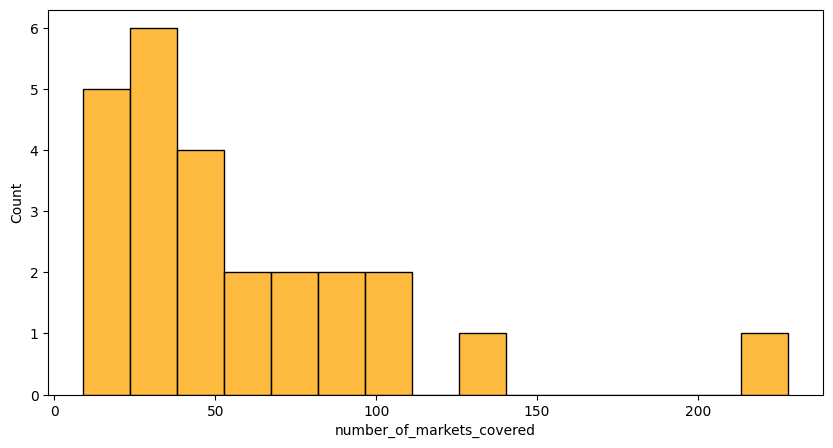

In [ ]:
plt.figure(figsize = (10,5))
sns.histplot(df["number_of_markets_covered"],bins = 15,color = "orange")

<Axes: xlabel='number_of_food_items', ylabel='Count'>

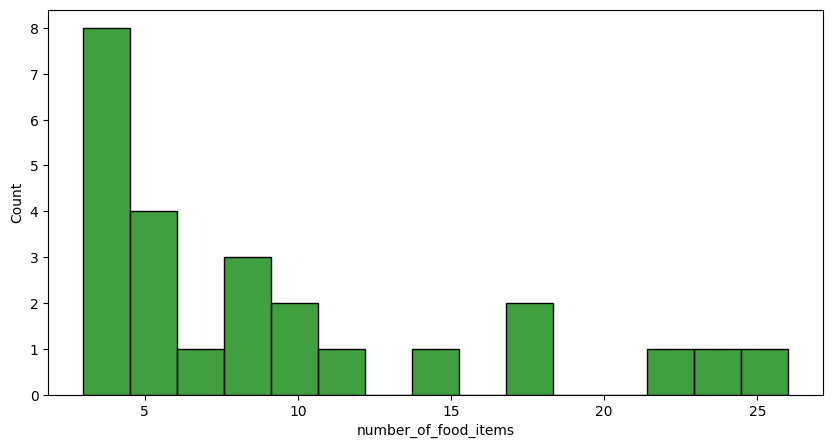

In [ ]:
# for number of food item
plt.figure(figsize = (10,5))
sns.histplot(df["number_of_food_items"],bins = 15,color = "g")

In [ ]:
# Group the data by 'country' and calculate the mean of 'average_annualized_food_inflation'
country_inflation = df.groupby('country')['average_annualized_food_inflation'].mean()

TypeError: Could not convert 6.06% to numeric

In [ ]:

highest_inflation = country_inflation.sort_values(ascending=False)# Plot the top 10 countries with the highest inflation
plt.figure(figsize=(12, 6))
highest_inflation.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Countries with Highest Food Price Inflation')
plt.xlabel('Country')
plt.ylabel('Average Annualized Food Inflation (%)')
plt.xticks(rotation=45)
plt.show()

NameError: name 'country_inflation' is not defined

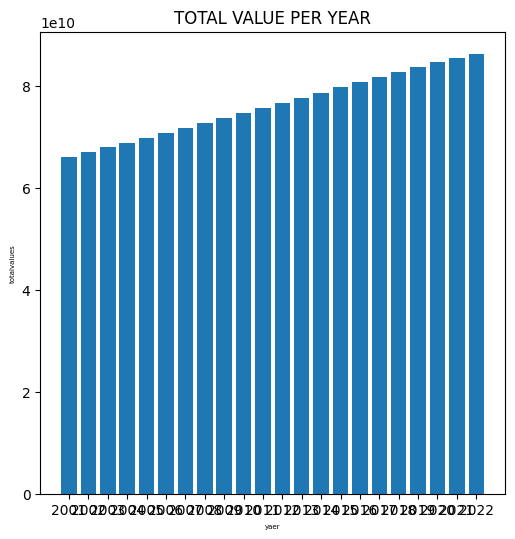

In [ ]:
plt.figure(figsize=(6,6))
plt.bar(years,total_values)
plt.ylabel('totalvalues',size=5)
plt.xlabel('yaer',size=5)
plt.title("TOTAL VALUE PER YEAR")
plt.show()

In [ ]:
#Comapring data of all year with 2001

In [ ]:
top_countries=df.sort_values(by='2001').head(10)
top_countries

,Country Name,Country Code,Indicator Name,Indicator Code,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
245,Tuvalu,TUV,"Population, total",SP.POP.TOTL,9621.0,9609.0,9668.0,9791.0,9912.0,10030.0,...,10918.0,10899.0,10877.0,10852.0,10828.0,10865.0,10956.0,11069.0,11204.0,11312.0
179,Nauru,NRU,"Population, total",SP.POP.TOTL,10363.0,10351.0,10344.0,10335.0,10318.0,10294.0,...,10694.0,10940.0,11185.0,11437.0,11682.0,11924.0,12132.0,12315.0,12511.0,12668.0
228,Turks and Caicos Islands,TCA,"Population, total",SP.POP.TOTL,19578.0,20598.0,21739.0,22869.0,23995.0,25128.0,...,33594.0,34985.0,36538.0,38246.0,39844.0,41487.0,43080.0,44276.0,45114.0,45703.0
188,Palau,PLW,"Population, total",SP.POP.TOTL,19828.0,19851.0,19880.0,19907.0,19831.0,19619.0,...,17805.0,17796.0,17794.0,17816.0,17837.0,17864.0,17916.0,17972.0,18024.0,18055.0
255,British Virgin Islands,VGB,"Population, total",SP.POP.TOTL,20657.0,21288.0,21982.0,22715.0,23497.0,24323.0,...,28657.0,28971.0,29366.0,29739.0,30060.0,30335.0,30610.0,30910.0,31122.0,31305.0
212,San Marino,SMR,"Population, total",SP.POP.TOTL,27335.0,27969.0,28601.0,29093.0,29508.0,29959.0,...,33285.0,33389.0,33570.0,33834.0,34056.0,34156.0,34178.0,34007.0,33745.0,33660.0
84,Gibraltar,GIB,"Population, total",SP.POP.TOTL,27721.0,27892.0,28301.0,28716.0,29155.0,29587.0,...,32411.0,32452.0,32520.0,32565.0,32602.0,32648.0,32685.0,32709.0,32669.0,32649.0
147,St. Martin (French part),MAF,"Population, total",SP.POP.TOTL,30387.0,31160.0,31929.0,32697.0,33452.0,34183.0,...,35639.0,35261.0,35020.0,34811.0,34496.0,33852.0,33121.0,32553.0,31948.0,31791.0
225,Sint Maarten (Dutch part),SXM,"Population, total",SP.POP.TOTL,30600.0,30777.0,31472.0,32488.0,33011.0,33441.0,...,36607.0,37685.0,38825.0,39969.0,40574.0,40895.0,41608.0,42310.0,42846.0,43389.0
149,Monaco,MCO,"Population, total",SP.POP.TOTL,32444.0,32386.0,32316.0,32236.0,32141.0,32011.0,...,35425.0,36110.0,36760.0,37071.0,37044.0,37029.0,37034.0,36922.0,36686.0,36469.0


In [ ]:
country_by_2001=top_countries.set_index('Country Name').T
country_by_2001

Country Name,Tuvalu,Nauru,Turks and Caicos Islands,Palau,British Virgin Islands,San Marino,Gibraltar,St. Martin (French part),Sint Maarten (Dutch part),Monaco
Country Code,TUV,NRU,TCA,PLW,VGB,SMR,GIB,MAF,SXM,MCO
Indicator Name,"Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total","Population, total"
Indicator Code,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL,SP.POP.TOTL
2001,9621.0,10363.0,19578.0,19828.0,20657.0,27335.0,27721.0,30387.0,30600.0,32444.0
2002,9609.0,10351.0,20598.0,19851.0,21288.0,27969.0,27892.0,31160.0,30777.0,32386.0
2003,9668.0,10344.0,21739.0,19880.0,21982.0,28601.0,28301.0,31929.0,31472.0,32316.0
2004,9791.0,10335.0,22869.0,19907.0,22715.0,29093.0,28716.0,32697.0,32488.0,32236.0
2005,9912.0,10318.0,23995.0,19831.0,23497.0,29508.0,29155.0,33452.0,33011.0,32141.0
2006,10030.0,10294.0,25128.0,19619.0,24323.0,29959.0,29587.0,34183.0,33441.0,32011.0
2007,10149.0,10267.0,26268.0,19366.0,25191.0,30372.0,29996.0,34887.0,33811.0,31823.0


In [ ]:
for country_name, data_values in country_by_2001.iterrows():
    fig = plt.figure(figsize=(5, 6))
    sb.barplot(x=data_values.index, y=data_values.values)
    plt.xlabel('Countries')
    plt.ylabel('Data Values')
    plt.title(f"{country_name} - Data Values from 2001 to 2022")
    plt.xticks(rotation=90)
    plt.show()

NameError: name 'country_by_2001' is not defined